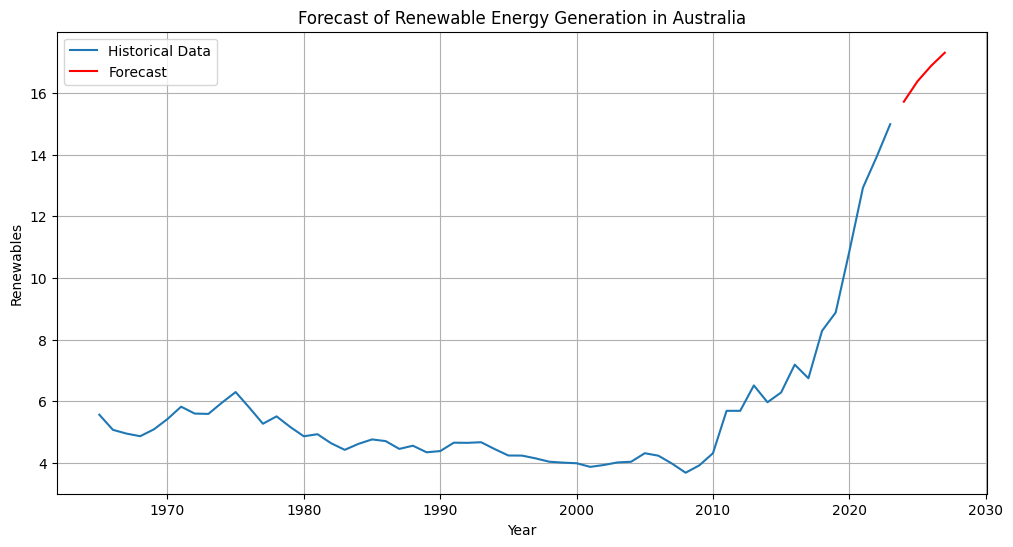

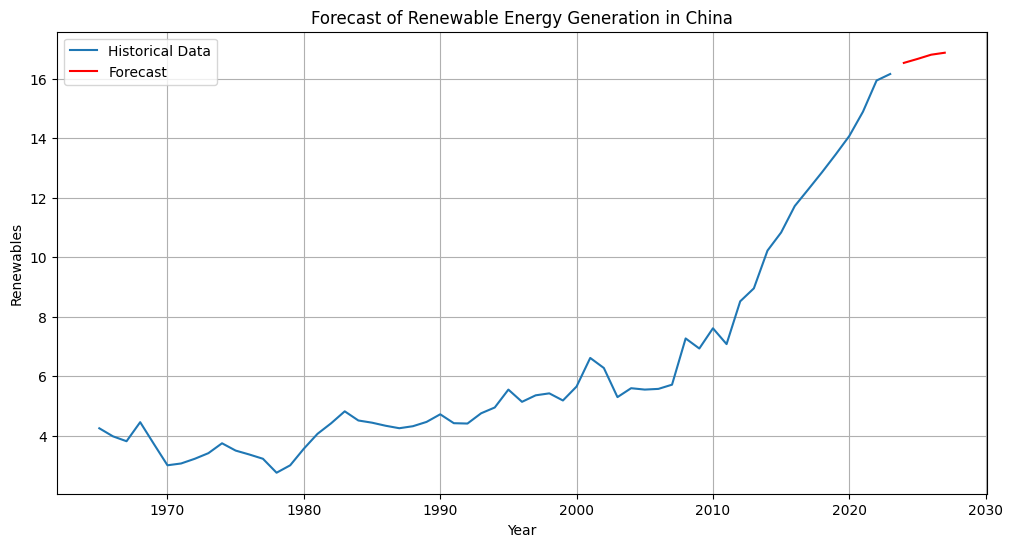

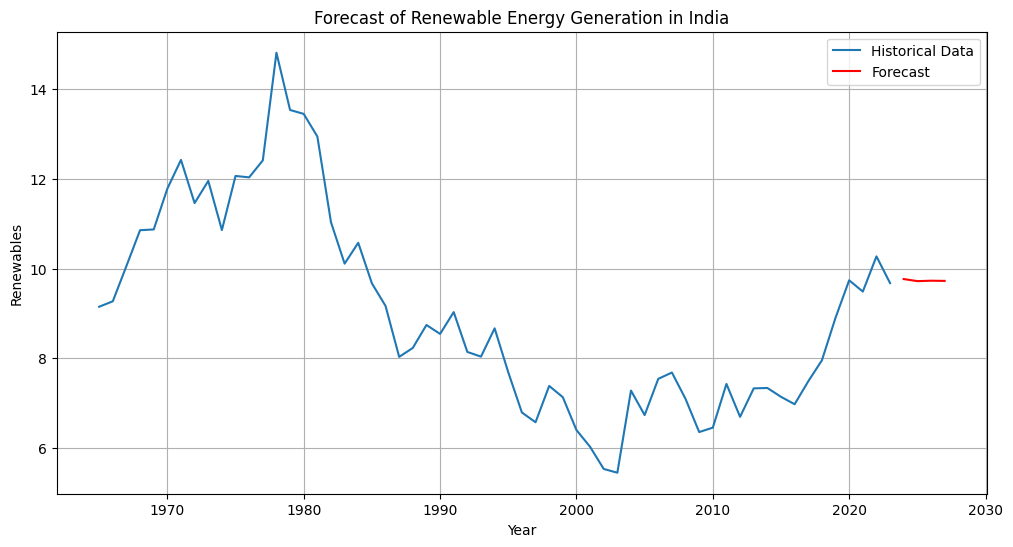

In [158]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'], format='%Y')
    data.set_index('Date', inplace=True)
    return data

def fit_arima(data, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    return model_fit

def forecast_and_plot(data, model_fit, forecast_years, country_name):
    forecast_result = model_fit.get_forecast(steps=forecast_years)
    forecast_mean = forecast_result.predicted_mean
    forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]

    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_dates, forecast_mean, color='red', label='Forecast')
    plt.title(f'Forecast of Renewable Energy Generation in {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Renewables')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data
aus_data = load_data('Aus.csv')
china_data = load_data('China.csv')
india_data = load_data('India.csv')

# Fit the model (using the best parameters found earlier or default ones)
aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed
india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed

# Forecast and plot for the next 4 years
forecast_and_plot(aus_data['Renewables'], aus_model_fit, 4, 'Australia')
forecast_and_plot(china_data['Renewables'], china_model_fit, 4, 'China')
forecast_and_plot(india_data['Renewables'], india_model_fit, 4, 'India')


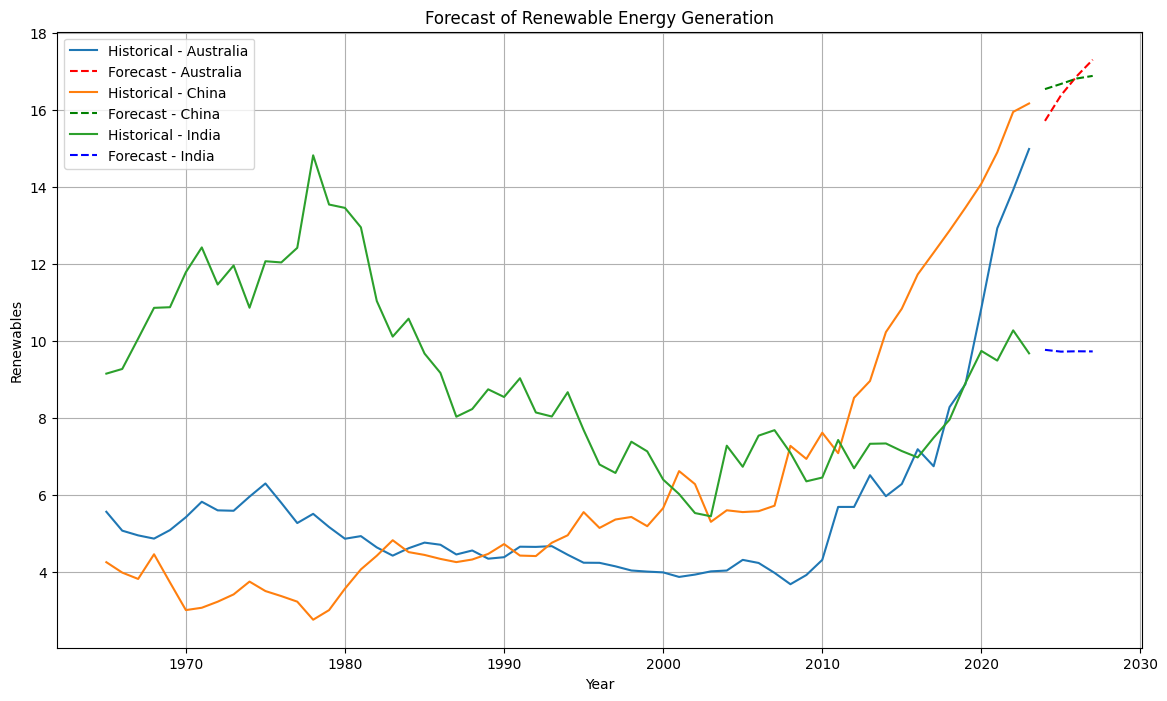

In [159]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'], format='%Y')
    data.set_index('Date', inplace=True)
    return data

def fit_arima(data, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    return model_fit

def forecast_data(data, model_fit, forecast_years):
    forecast_result = model_fit.get_forecast(steps=forecast_years)
    forecast_mean = forecast_result.predicted_mean
    forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]
    return forecast_dates, forecast_mean

# Load the data
aus_data = load_data('Aus.csv')
china_data = load_data('China.csv')
india_data = load_data('India.csv')

# Fit the model (assuming parameters are found or guessed)
aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed
india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)  # Adjust parameters as needed

# Forecast data
aus_dates, aus_forecast = forecast_data(aus_data['Renewables'], aus_model_fit, 4)
china_dates, china_forecast = forecast_data(china_data['Renewables'], china_model_fit, 4)
india_dates, india_forecast = forecast_data(india_data['Renewables'], india_model_fit, 4)

# Plot all forecasts on the same plot
plt.figure(figsize=(14, 8))
plt.plot(aus_data.index, aus_data['Renewables'], label='Historical - Australia')
plt.plot(aus_dates, aus_forecast, 'r--', label='Forecast - Australia')
plt.plot(china_data.index, china_data['Renewables'], label='Historical - China')
plt.plot(china_dates, china_forecast, 'g--', label='Forecast - China')
plt.plot(india_data.index, india_data['Renewables'], label='Historical - India')
plt.plot(india_dates, india_forecast, 'b--', label='Forecast - India')
plt.title('Forecast of Renewable Energy Generation')
plt.xlabel('Year')
plt.ylabel('Renewables')
plt.legend()
plt.grid(True)
plt.show()


In [160]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go
import plotly.offline as pyo

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'], format='%Y')
    data.set_index('Date', inplace=True)
    return data

def fit_arima(data, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    return model_fit

def forecast_data(data, model_fit, forecast_years):
    forecast_result = model_fit.get_forecast(steps=forecast_years)
    forecast_mean = forecast_result.predicted_mean
    forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]
    return forecast_dates, forecast_mean

# Load the data
aus_data = load_data('Aus.csv')
china_data = load_data('China.csv')
india_data = load_data('India.csv')

# Fit the model
aus_model_fit = fit_arima(aus_data['Renewables'], 2, 1, 0)
china_model_fit = fit_arima(china_data['Renewables'], 2, 1, 0)
india_model_fit = fit_arima(india_data['Renewables'], 2, 1, 0)

# Forecast data
aus_dates, aus_forecast = forecast_data(aus_data['Renewables'], aus_model_fit, 4)
china_dates, china_forecast = forecast_data(china_data['Renewables'], china_model_fit, 4)
india_dates, india_forecast = forecast_data(india_data['Renewables'], india_model_fit, 4)

# Create Plotly traces
trace_aus = go.Scatter(x=aus_data.index, y=aus_data['Renewables'], mode='lines', name='Historical - Australia')
trace_aus_forecast = go.Scatter(x=aus_dates, y=aus_forecast, mode='lines', name='Forecast - Australia')

trace_china = go.Scatter(x=china_data.index, y=china_data['Renewables'], mode='lines', name='Historical - China')
trace_china_forecast = go.Scatter(x=china_dates, y=china_forecast, mode='lines', name='Forecast - China')

trace_india = go.Scatter(x=india_data.index, y=india_data['Renewables'], mode='lines', name='Historical - India')
trace_india_forecast = go.Scatter(x=india_dates, y=india_forecast, mode='lines', name='Forecast - India')

data = [trace_aus, trace_aus_forecast, trace_china, trace_china_forecast, trace_india, trace_india_forecast]

layout = go.Layout(
    title='Forecast of Renewable Energy Generation',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Renewables'),
    template='plotly_white'
)

fig = go.Figure(data=data, layout=layout)

# Save the plot
pyo.plot(fig, filename='renewable_energy_forecast.html')


'renewable_energy_forecast.html'